<a href="https://colab.research.google.com/github/Atharva-Sankhe/Compute_ML_task/blob/main/Compute3EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('haberman.csv')

In [3]:
df.columns = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

In [4]:
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.shape

(305, 4)

In [7]:
df.isnull().sum()

patient_age                0
operation_year             0
positive_axillary_nodes    0
survival_status            0
dtype: int64

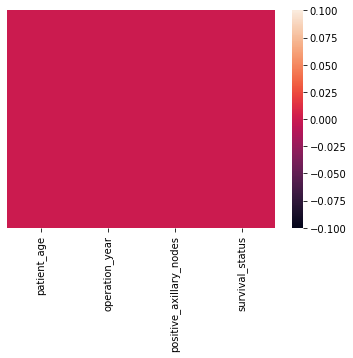

In [17]:
sns.heatmap(df.isnull(),  yticklabels = False)

In [9]:
df.duplicated().sum()

17

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})
df.head(10)

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes
5,33,60,0,yes
6,34,59,0,no
7,34,66,9,no
8,34,58,30,yes
9,34,60,1,yes


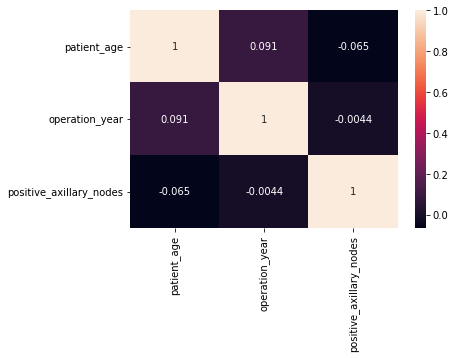

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

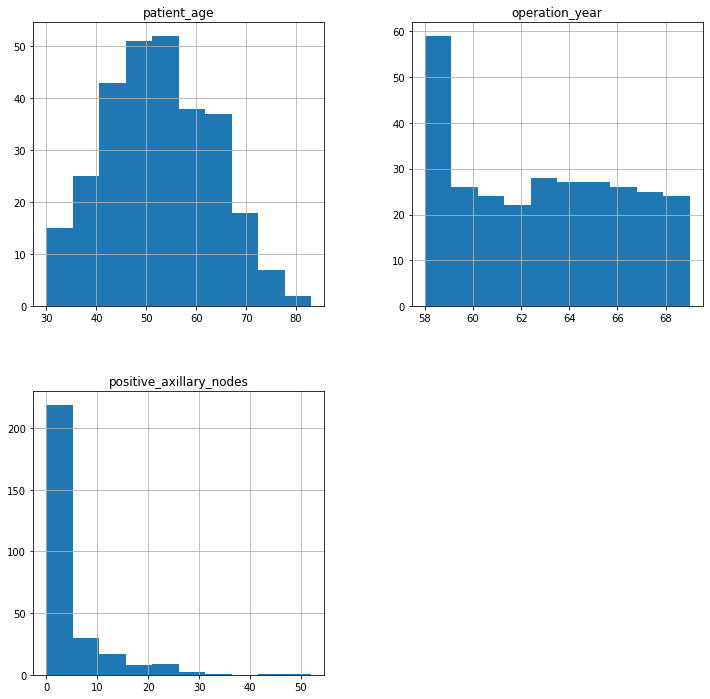

In [14]:
df.hist(figsize=(12,12))
plt.show()

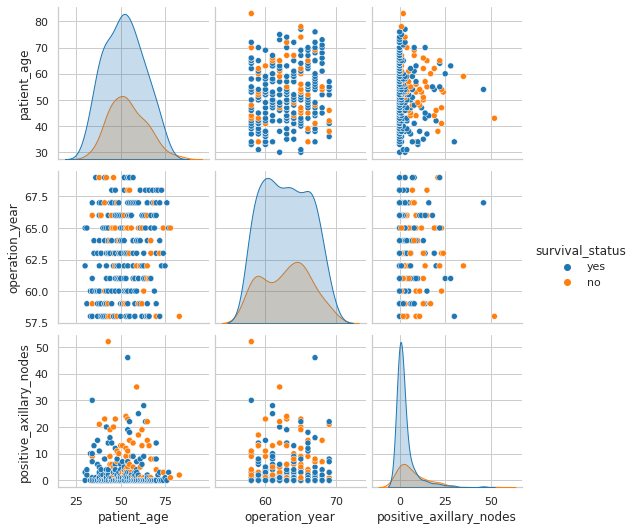

In [31]:
sns.set_style('whitegrid')
sns.pairplot(df,hue = 'survival_status',palette='tab10')
plt.show()

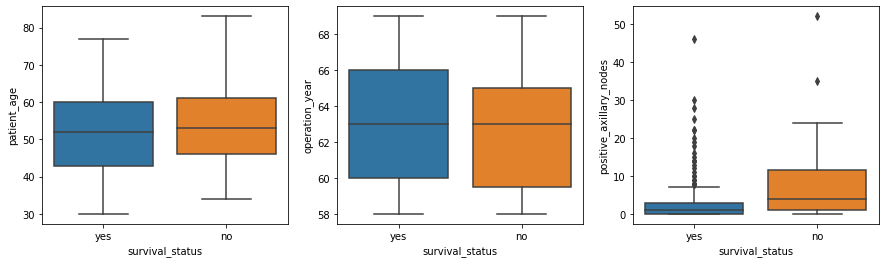

In [16]:
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.boxplot(x = 'survival_status', y = 'patient_age', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'survival_status', y = 'operation_year', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'survival_status', y = 'positive_axillary_nodes', data = df)
plt.show()

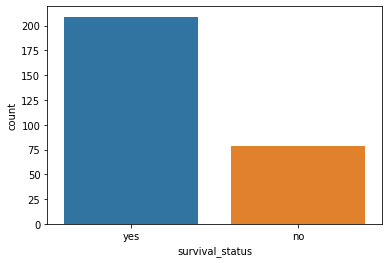

In [18]:
sns.countplot(x=df['survival_status'])

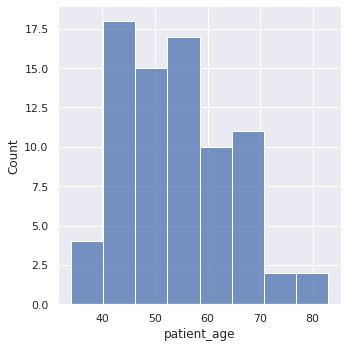

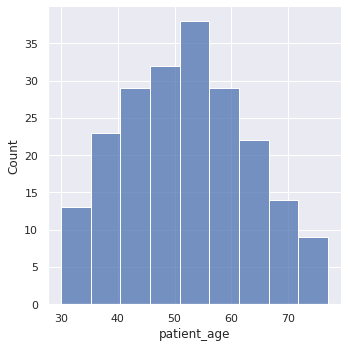

In [49]:
sns.set()
sns.displot(df[df['survival_status']=='no']['patient_age'],kind='hist')
sns.displot(df[df['survival_status']=='yes']['patient_age'],kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


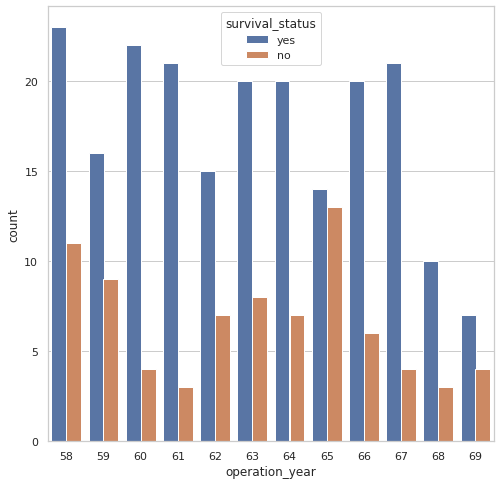

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(df['operation_year'],hue=df['survival_status'])

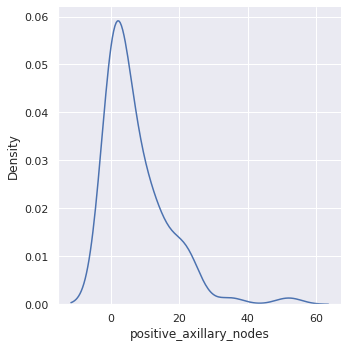

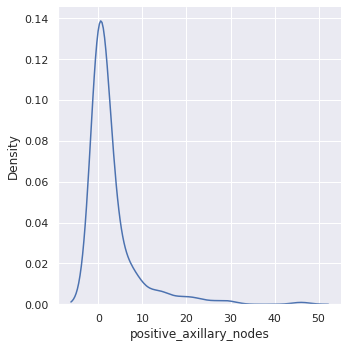

In [41]:
sns.set()
sns.displot(df[df['survival_status']=='no']['positive_axillary_nodes'],kind='kde')
sns.displot(df[df['survival_status']=='yes']['positive_axillary_nodes'],kind='kde')

In [61]:
year=df.groupby('operation_year').count()
year.rename(columns = {'patient_age':'total operation'}, inplace = True)
year

,total operation,positive_axillary_nodes,survival_status
operation_year,,,
58,34,34,34
59,25,25,25
60,26,26,26
61,24,24,24
62,22,22,22
63,28,28,28
64,27,27,27
65,27,27,27
66,26,26,26


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


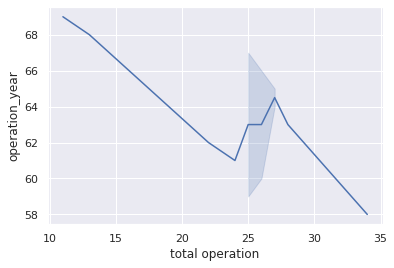

In [64]:
sns.lineplot(year['total operation'],year.index)


In [76]:
age_sur=df.groupby('patient_age').count().rename(columns={'survival_status':'survived'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


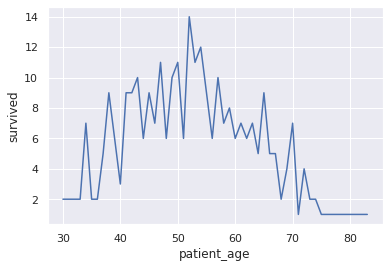

In [74]:
sns.lineplot(age_sur.index,age_sur['survived'])